In [ ]:
# importing necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import os
%matplotlib inline

In [ ]:
# mounting files from drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
!ls /content/drive/


MyDrive  Othercomputers


In [ ]:
%cd /content/drive/MyDrive/stock data


/content/drive/MyDrive/stock data


In [ ]:
!ls

fundamentals.csv  prices.csv  prices-split-adjusted.csv  securities.csv


In [ ]:
import os
current_folder = os.getcwd()
contents = os.listdir(current_folder)
print(contents)


['securities.csv', 'prices-split-adjusted.csv', 'prices.csv', 'fundamentals.csv']


In [ ]:
data1 = pd.read_csv('securities.csv')
data2 = pd.read_csv('prices-split-adjusted.csv')
data3 = pd.read_csv('prices.csv',parse_dates=['date'])
data4 = pd.read_csv('fundamentals.csv')

In [ ]:
data1.info(),data2.info(),data3.info(),data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Ticker symbol            505 non-null    object
 1   Security                 505 non-null    object
 2   SEC filings              505 non-null    object
 3   GICS Sector              505 non-null    object
 4   GICS Sub Industry        505 non-null    object
 5   Address of Headquarters  505 non-null    object
 6   Date first added         307 non-null    object
 7   CIK                      505 non-null    int64 
dtypes: int64(1), object(7)
memory usage: 31.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851264 entries, 0 to 851263
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    851264 non-null  object 
 1   symbol  851264 non-null  object 
 2   open    851264 non-null  float64
 3   close   85

(None, None, None, None)

In [ ]:
data1_df = pd.DataFrame(data1)
data2_df = pd.DataFrame(data2)
data3_df = pd.DataFrame(data3)
data4_df = pd.DataFrame(data4)
print(data1_df)
print(data2_df)
print(data3_df)
print(data4_df)

    Ticker symbol                Security SEC filings             GICS Sector  \
0             MMM              3M Company     reports             Industrials   
1             ABT     Abbott Laboratories     reports             Health Care   
2            ABBV                  AbbVie     reports             Health Care   
3             ACN           Accenture plc     reports  Information Technology   
4            ATVI     Activision Blizzard     reports  Information Technology   
..            ...                     ...         ...                     ...   
500          YHOO              Yahoo Inc.     reports  Information Technology   
501           YUM         Yum! Brands Inc     reports  Consumer Discretionary   
502           ZBH  Zimmer Biomet Holdings     reports             Health Care   
503          ZION           Zions Bancorp     reports              Financials   
504           ZTS                  Zoetis     reports             Health Care   

                  GICS Sub 

In [ ]:
data1_df.isnull().sum()

Ticker symbol                0
Security                     0
SEC filings                  0
GICS Sector                  0
GICS Sub Industry            0
Address of Headquarters      0
Date first added           198
CIK                          0
dtype: int64

In [ ]:
data2_df.isnull().sum()

date      0
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64

In [ ]:
data3_df.isnull().sum()

date      0
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64

In [ ]:
data4_df.isnull().sum()

Unnamed: 0                        0
Ticker Symbol                     0
Period Ending                     0
Accounts Payable                  0
Accounts Receivable               0
                               ... 
Total Revenue                     0
Treasury Stock                    0
For Year                        173
Earnings Per Share              219
Estimated Shares Outstanding    219
Length: 79, dtype: int64

In [ ]:
data1_df.head(100)

,Ticker symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",NaN,66740
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800
2,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152
3,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373
4,ATVI,Activision Blizzard,reports,Information Technology,Home Entertainment Software,"Santa Monica, California",2015-08-31,718877
...,...,...,...,...,...,...,...,...
95,SCHW,Charles Schwab Corporation,reports,Financials,Investment Banking & Brokerage,"San Francisco, California",NaN,316709
96,CHTR,Charter Communications,reports,Consumer Discretionary,Cable & Satellite,"Stamford, Connecticut",2016-09-08,1091667
97,CHK,Chesapeake Energy,reports,Energy,Integrated Oil & Gas,"Oklahoma City, Oklahoma",NaN,895126
98,CVX,Chevron Corp.,reports,Energy,Integrated Oil & Gas,"San Ramon, California",NaN,93410


In [ ]:
null_column = data1_df['Date first added']

In [ ]:
data1_df['Date first added'] = pd.to_datetime(data1_df['Date first added'])
mean_value = data1_df['Date first added'].mean()
data1_df['Date first added'].fillna(mean_value,inplace=True)
print(data1_df)

    Ticker symbol                Security SEC filings             GICS Sector  \
0             MMM              3M Company     reports             Industrials   
1             ABT     Abbott Laboratories     reports             Health Care   
2            ABBV                  AbbVie     reports             Health Care   
3             ACN           Accenture plc     reports  Information Technology   
4            ATVI     Activision Blizzard     reports  Information Technology   
..            ...                     ...         ...                     ...   
500          YHOO              Yahoo Inc.     reports  Information Technology   
501           YUM         Yum! Brands Inc     reports  Consumer Discretionary   
502           ZBH  Zimmer Biomet Holdings     reports             Health Care   
503          ZION           Zions Bancorp     reports              Financials   
504           ZTS                  Zoetis     reports             Health Care   

                  GICS Sub 

In [ ]:
data1_df.head(100)

,Ticker symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",2001-07-25 05:00:11.726384384,66740
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31 00:00:00.000000000,1800
2,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31 00:00:00.000000000,1551152
3,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06 00:00:00.000000000,1467373
4,ATVI,Activision Blizzard,reports,Information Technology,Home Entertainment Software,"Santa Monica, California",2015-08-31 00:00:00.000000000,718877
...,...,...,...,...,...,...,...,...
95,SCHW,Charles Schwab Corporation,reports,Financials,Investment Banking & Brokerage,"San Francisco, California",2001-07-25 05:00:11.726384384,316709
96,CHTR,Charter Communications,reports,Consumer Discretionary,Cable & Satellite,"Stamford, Connecticut",2016-09-08 00:00:00.000000000,1091667
97,CHK,Chesapeake Energy,reports,Energy,Integrated Oil & Gas,"Oklahoma City, Oklahoma",2001-07-25 05:00:11.726384384,895126
98,CVX,Chevron Corp.,reports,Energy,Integrated Oil & Gas,"San Ramon, California",2001-07-25 05:00:11.726384384,93410


In [ ]:
data1_df.isnull().sum()

Ticker symbol              0
Security                   0
SEC filings                0
GICS Sector                0
GICS Sub Industry          0
Address of Headquarters    0
Date first added           0
CIK                        0
dtype: int64

In [ ]:
null_columns = data4_df.columns[data4_df.isnull().any()].tolist()

In [ ]:
print(null_columns)

['Cash Ratio', 'Current Ratio', 'Quick Ratio', 'For Year', 'Earnings Per Share', 'Estimated Shares Outstanding']


In [ ]:
mean_value2 = data4_df['Cash Ratio'].mean()
data4_df['Cash Ratio'].fillna(mean_value2,inplace=True)
mean_value3 = data4_df['Current Ratio'].mean()
data4_df['Current Ratio'].fillna(mean_value3,inplace=True)
mean_value4 = data4_df['Quick Ratio'].mean()
data4_df['Quick Ratio'].fillna(mean_value4,inplace=True)
mean_value5 = data4_df['For Year'].mean()
data4_df['For Year'].fillna(mean_value5,inplace=True)
mean_value6 = data4_df['Earnings Per Share'].mean()
data4_df['Earnings Per Share'].fillna(mean_value6,inplace=True)
mean_value7 = data4_df['Estimated Shares Outstanding'].mean()
data4_df['Estimated Shares Outstanding'].fillna(mean_value7,inplace=True)

In [ ]:
data4_df.head(100)

,Unnamed: 0,Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
0,0,AAL,2012-12-31,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,...,7.072000e+09,9.011000e+09,-7.987000e+09,2.489100e+10,1.690400e+10,2.485500e+10,-3.670000e+08,2012.000000,-5.600000,3.350000e+08
1,1,AAL,2013-12-31,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,...,1.432300e+10,1.380600e+10,-2.731000e+09,4.500900e+10,4.227800e+10,2.674300e+10,0.000000e+00,2013.000000,-11.250000,1.630222e+08
2,2,AAL,2014-12-31,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,...,1.175000e+10,1.340400e+10,2.021000e+09,4.120400e+10,4.322500e+10,4.265000e+10,0.000000e+00,2014.000000,4.020000,7.169154e+08
3,3,AAL,2015-12-31,5.102000e+09,352000000.0,-7.080000e+08,135.0,-6.151000e+09,1.159100e+10,51.0,...,9.985000e+09,1.360500e+10,5.635000e+09,4.278000e+10,4.841500e+10,4.099000e+10,0.000000e+00,2015.000000,11.390000,6.681299e+08
4,4,AAP,2012-12-29,2.409453e+09,-89482000.0,6.000000e+05,32.0,-2.711820e+08,5.202150e+08,23.0,...,3.184200e+09,2.559638e+09,1.210694e+09,3.403120e+09,4.613814e+09,6.205003e+09,-2.709500e+07,2012.000000,5.290000,7.328355e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,ALXN,2016-12-31,5.720000e+08,-122000000.0,6.000000e+06,5.0,-3.330000e+08,7.957000e+09,157.0,...,2.578000e+09,8.230000e+08,8.694000e+09,4.559000e+09,1.325300e+10,3.084000e+09,-1.141000e+09,2013.305348,3.353707,6.024244e+08
96,96,AMAT,2013-10-27,1.649000e+09,-404000000.0,1.300000e+07,4.0,-1.970000e+08,6.151000e+09,77.0,...,5.642000e+09,2.443000e+09,7.088000e+09,4.955000e+09,1.204300e+10,7.509000e+09,-1.152400e+10,2013.000000,0.210000,1.219048e+09
97,97,AMAT,2014-10-26,1.883000e+09,-21000000.0,2.300000e+07,14.0,-2.410000e+08,6.384000e+09,112.0,...,6.967000e+09,2.823000e+09,7.868000e+09,5.306000e+09,1.317400e+10,9.072000e+09,-1.152400e+10,2014.000000,0.880000,1.218182e+09
98,98,AMAT,2015-10-25,1.833000e+09,-61000000.0,8.000000e+06,18.0,-2.150000e+08,6.575000e+09,131.0,...,9.261000e+09,3.798000e+09,7.613000e+09,7.695000e+09,1.530800e+10,9.659000e+09,-1.284800e+10,2015.000000,1.130000,1.218584e+09


In [ ]:
data4_df.isnull().sum()

Unnamed: 0                      0
Ticker Symbol                   0
Period Ending                   0
Accounts Payable                0
Accounts Receivable             0
                               ..
Total Revenue                   0
Treasury Stock                  0
For Year                        0
Earnings Per Share              0
Estimated Shares Outstanding    0
Length: 79, dtype: int64

In [ ]:
data3_df["symbol"].value_counts()

KSU     1762
NOC     1762
ORCL    1762
OMC     1762
OKE     1762
        ... 
KHC      378
HPE      304
CSRA     284
WLTW     251
FTV      126
Name: symbol, Length: 501, dtype: int64

In [ ]:
pfizer = data3_df[data3_df["symbol"] == "PFE"]

GOOGLE

In [ ]:
google = data3_df[data3_df["symbol"] == 'GOOG']
google.head()


,date,symbol,open,close,low,high,volume
439,2010-01-04,GOOG,626.951088,626.751061,624.241073,629.511067,3927000.0
907,2010-01-05,GOOG,627.181073,623.991055,621.541045,627.841071,6031900.0
1375,2010-01-06,GOOG,625.861078,608.261023,606.361042,625.861078,7987100.0
1843,2010-01-07,GOOG,609.401025,594.101005,592.651008,610.001045,12876600.0
2311,2010-01-08,GOOG,592.000997,602.021036,589.110988,603.251034,9483900.0


In [ ]:
import plotly.express as px
px.line(google,x="date",y=["open","close"],title="Difference between open and close prices of Google stocks")


In [ ]:
google['TP'] = (google['close'] + google['low'] + google['high'])/3
google['std'] = google['TP'].rolling(20).std(ddof=0)
google['MA-TP'] = google['TP'].rolling(20).mean()
google['BOLU'] = google['MA-TP'] + 2*google['std']
google['BOLD'] = google['MA-TP'] - 2*google['std']


<Figure size 2000x2000 with 0 Axes>

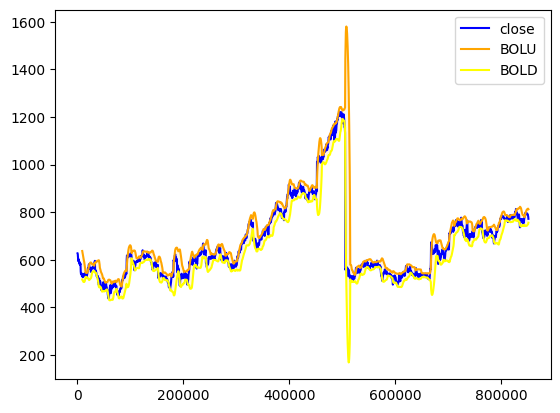

In [ ]:
plt.figure(figsize=(20,20))
ax = google[['close', 'BOLU', 'BOLD']].plot(color=['blue', 'orange', 'yellow'])
ax.fill_between(google.index, google['BOLD'], google['BOLU'], facecolor='orange', alpha=0.1)
plt.show()

In [ ]:
px.line(google,x="date",y=["volume"],title="Volume of stock traded")


WHAT DOES THE CANDLE STICK SAY?

In [ ]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Candlestick(x=google['date'],
                open=google['open'],
                high=google['high'],
                low=google['low'],
                close=google['close'],
                increasing_line_color= '#FF1700',
                decreasing_line_color= '#06FF00'
                    )])
fig.show()


OMC STOCK

In [ ]:
omc = data3_df[data3_df["symbol"] == 'OMC']


In [ ]:
px.line(omc,x="date",y=["high","low"],title="Difference between high and low prices of OMC stocks")


In [ ]:
omc['TP'] = (omc['close'] + omc['low'] + omc['high'])/3
omc['std'] = omc['TP'].rolling(20).std(ddof=0)
omc['MA-TP'] = omc['TP'].rolling(20).mean()
omc['BOLU'] = omc['MA-TP'] + 2*omc['std']
omc['BOLD'] = omc['MA-TP'] - 2*omc['std']


<Figure size 2000x2000 with 0 Axes>

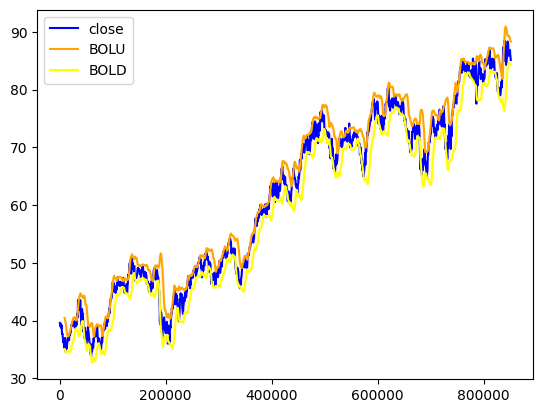

In [ ]:
plt.figure(figsize=(20,20))
ax = omc[['close', 'BOLU', 'BOLD']].plot(color=['blue', 'orange', 'yellow'])
ax.fill_between(omc.index, omc['BOLD'], omc['BOLU'], facecolor='orange', alpha=0.1)
plt.show()


In [ ]:
omc =omc.set_index("date")


<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

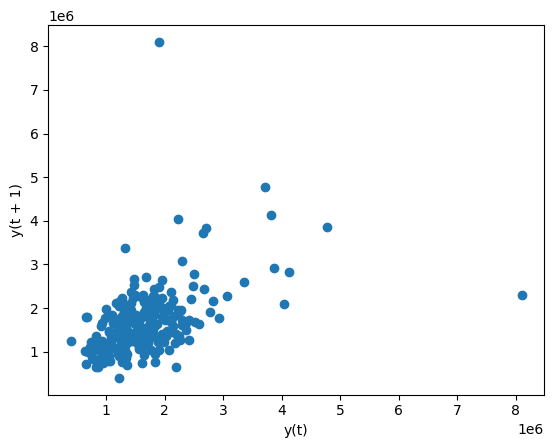

In [ ]:
from pandas.plotting import lag_plot

lag_plot(omc['volume'].tail(250))


In [ ]:
px.line(pfizer,x="date",y=["open","close"],title="Difference between open and close prices of Pfizer stocks")


<Figure size 2000x2000 with 0 Axes>

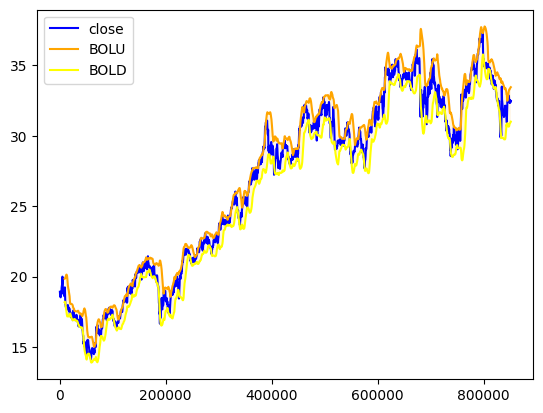

In [ ]:
pfizer['TP'] = (pfizer['close'] + pfizer['low'] + pfizer['high'])/3
pfizer['std'] = pfizer['TP'].rolling(20).std(ddof=0)
pfizer['MA-TP'] = pfizer['TP'].rolling(20).mean()
pfizer['BOLU'] = pfizer['MA-TP'] + 2*pfizer['std']
pfizer['BOLD'] = pfizer['MA-TP'] - 2*pfizer['std']
plt.figure(figsize=(20,20))
ax = pfizer[['close', 'BOLU', 'BOLD']].plot(color=['blue', 'orange', 'yellow'])
ax.fill_between(pfizer.index, pfizer['BOLD'], pfizer['BOLU'], facecolor='orange', alpha=0.1)
plt.show()


<Axes: title={'center': 'Volume of Pfizer stocks over the years'}, xlabel='date'>

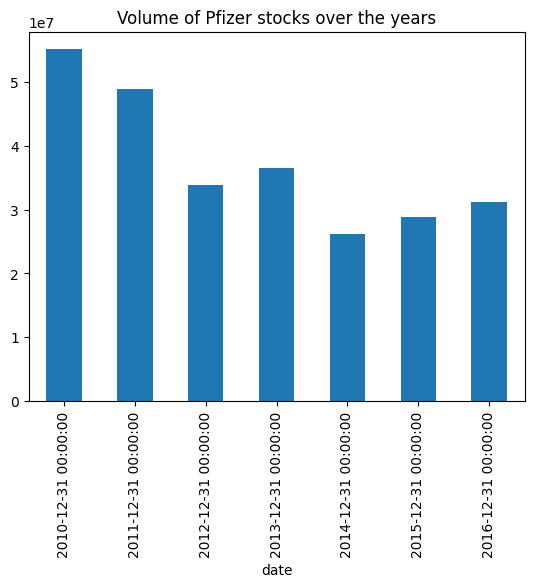

In [ ]:
pfizer = pfizer.set_index("date")
pfizer['volume'].resample('Y').mean().plot.bar(title="Volume of Pfizer stocks over the years")


In [ ]:
data3_df["date"] = pd.to_datetime(data3_df["date"])

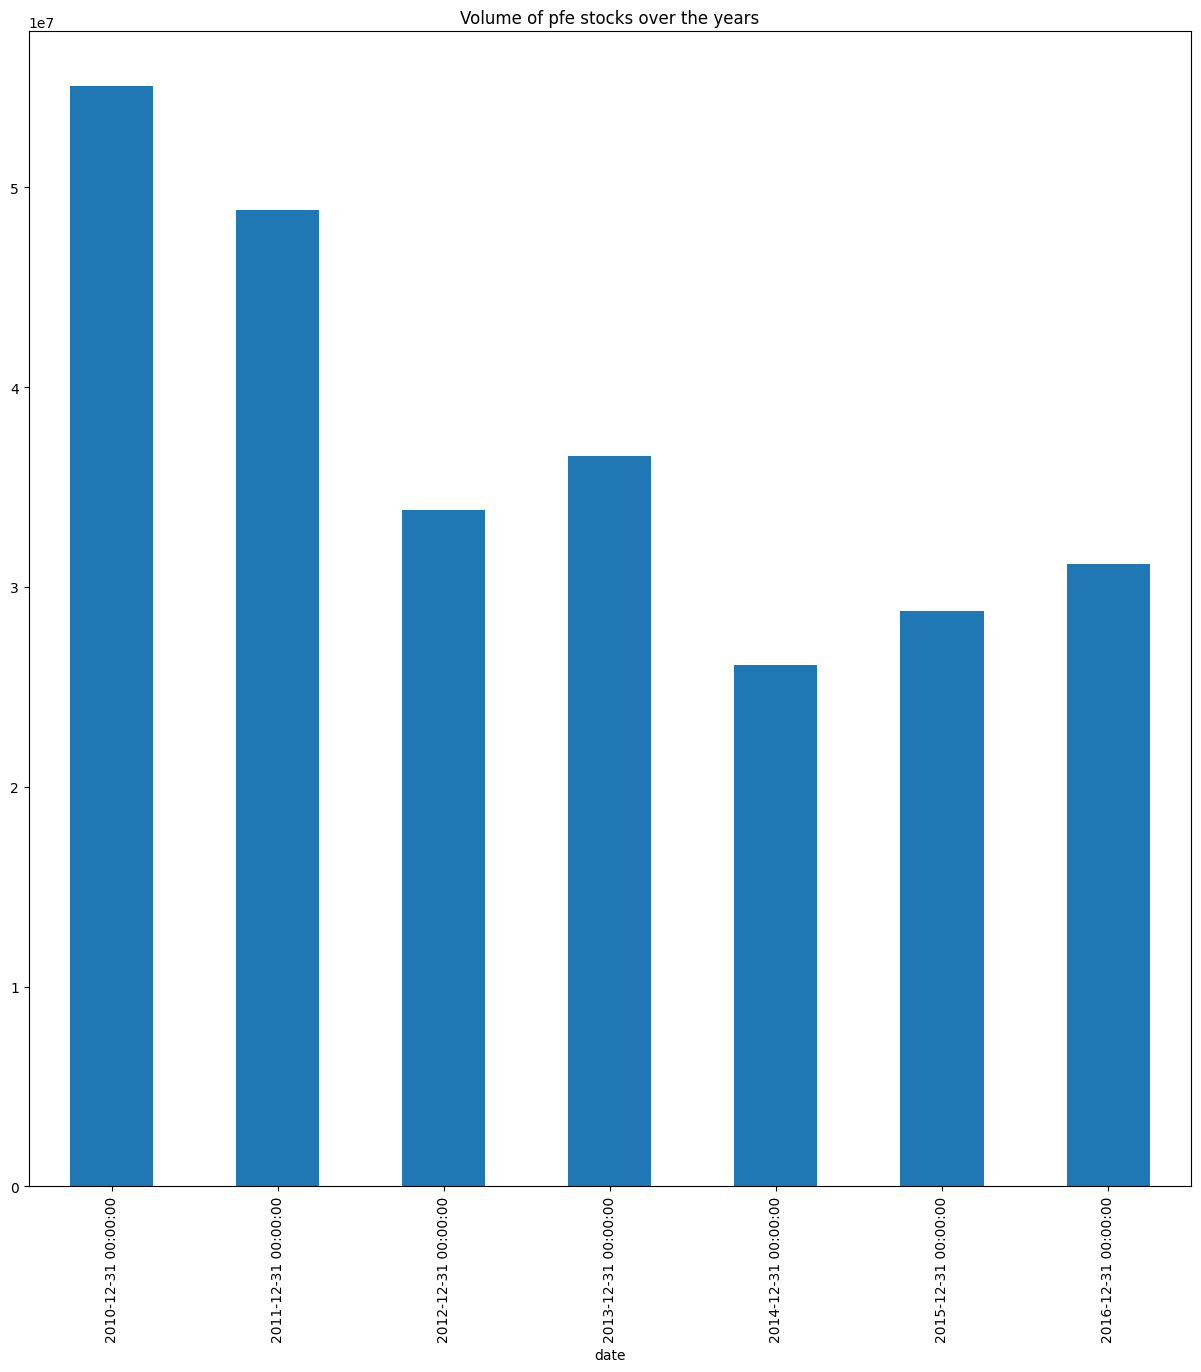

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
data3_df = data3_df.set_index("date")
pfizer['volume'].resample('Y').mean().plot.bar(title="Volume of pfe stocks over the years")
plt.show()


SPLITTING THE DATA INTO TRAIN AND TEST

In [ ]:
train = pfizer[:-180]
test = pfizer[-180:]


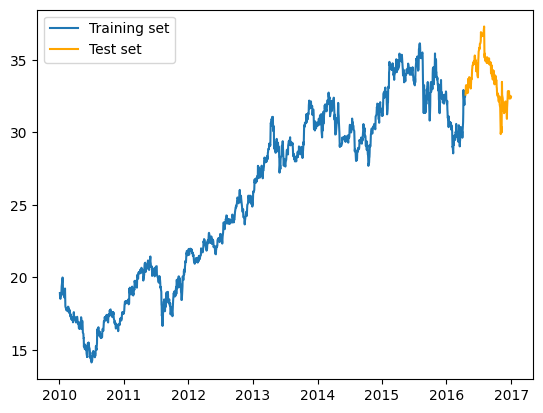

In [ ]:
plt.plot(train["close"], label='Training set')
plt.plot(test["close"], label='Test set', color='orange')
plt.legend();


FITTING A BASIC ARIMA MODEL

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train["close"], order=(0,1,1))
results = model.fit()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



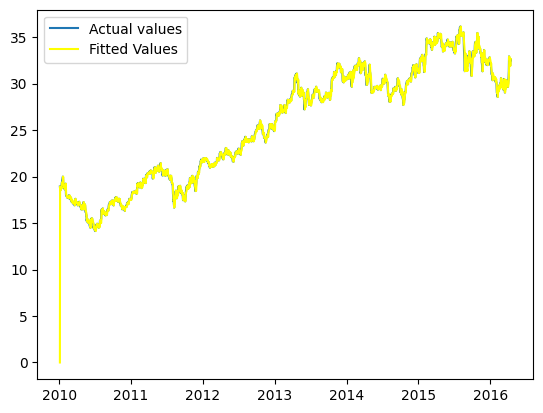

In [ ]:
plt.plot(train["close"], label='Actual values')
plt.plot(results.fittedvalues, color='yellow',label='Fitted Values')
plt.legend();



In [ ]:
predictions = results.forecast(steps=180)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



In [ ]:
predictions


1582    32.50043
1583    32.50043
1584    32.50043
1585    32.50043
1586    32.50043
          ...   
1757    32.50043
1758    32.50043
1759    32.50043
1760    32.50043
1761    32.50043
Name: predicted_mean, Length: 180, dtype: float64

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
train['symbol'] = label_encoder.fit_transform(train['symbol'])
test['symbol'] = label_encoder.transform(test['symbol'])


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(train)
X_test = scaler.transform(test)


In [ ]:
xtrain = train[['volume','open']]
xtest = test[['volume','open']]
ytrain = train["close"]
ytest = test["close"]
print(ytrain)


date
2010-01-04    18.930000
2010-01-05    18.660000
2010-01-06    18.600000
2010-01-07    18.530001
2010-01-08    18.680000
                ...    
2016-04-11    31.889999
2016-04-12    31.959999
2016-04-13    32.540001
2016-04-14    32.650002
2016-04-15    32.500000
Name: close, Length: 1582, dtype: float64


USING LINEAR REGRESSION

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
model = LinearRegression()
model.fit(xtrain,ytrain)
pred=model.predict(xtest)
print(pred)

[32.49181839 32.79726693 32.84204588 33.05223634 33.2479288  33.12965563
 33.19605853 32.97861281 32.96332889 32.86266664 32.55046898 33.61255645
 33.65931333 33.36945359 33.37989608 33.53314144 33.82756464 33.45416366
 33.21858434 33.33203869 32.93182823 33.26379723 33.01323303 33.15774889
 33.47092278 33.8282894  33.68516672 34.11974528 34.25613821 34.3797544
 34.65942247 34.69674549 34.68136342 34.86343483 34.69880253 34.83610511
 34.76705319 35.0451162  35.1077275  35.01093979 34.59041637 35.00816361
 34.67738831 34.76852225 34.47767163 34.50548462 34.7350865  34.6962011
 33.78293734 33.79383539 34.14755982 34.61559708 35.13271371 35.14855666
 35.53645263 35.81196315 35.78794824 35.87796935 36.06848686 36.14854303
 36.28000805 36.47894967 36.95975739 36.68668506 36.66688659 36.89973068
 36.66967551 36.79904548 36.80004425 36.83001794 36.74795659 36.87673146
 36.67319182 37.00712064 36.74411462 35.88889019 35.49327523 35.35203007
 35.26966305 34.99062406 35.17248433 35.13315024 35.0

In [ ]:
sc=np.round(model.score(xtest, ytest),2) * 100
r2=np.round(r2_score(ytest,pred),2)
mse=np.round(mean_squared_error(ytest,pred),2)
mae=np.round(mean_squared_error(ytest,pred),2)


Accuracy score : 97.0 %
R2 Score : 0.97
Mean Squared error : 0.07
Mean Absolute error : 0.07


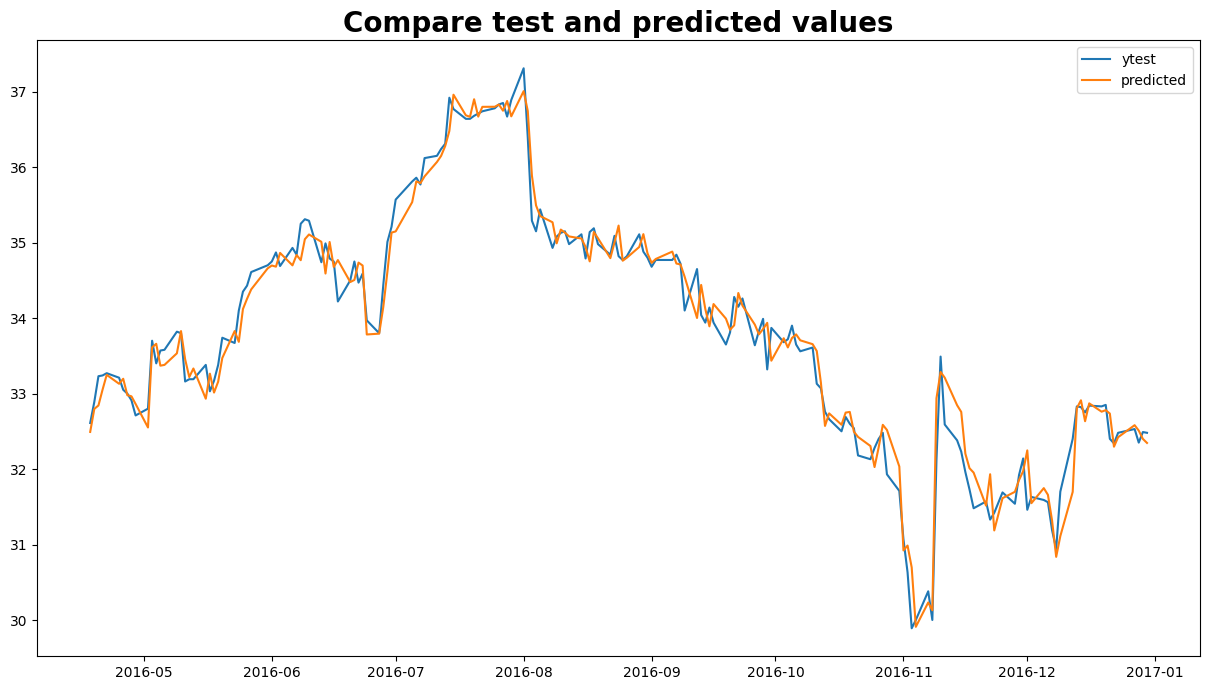

In [ ]:
fig=plt.figure(figsize=(15,8))
p=pd.Series(pred, index=ytest.index)
plt.plot(ytest)
plt.plot(p)
plt.legend(['ytest','predicted'])
plt.title("Compare test and predicted values", size=20, weight='bold')
print('Accuracy score : {} %'.format(sc))
print('R2 Score : {}'.format(r2))
print('Mean Squared error : {}'.format(mse))
print('Mean Absolute error : {}'.format(mae))


CHECKING STATIONARY OF TIME SERIES DATA

In [ ]:
import seaborn as sns


Text(0.5, 1.0, 'Checking stationary of timeseries data')

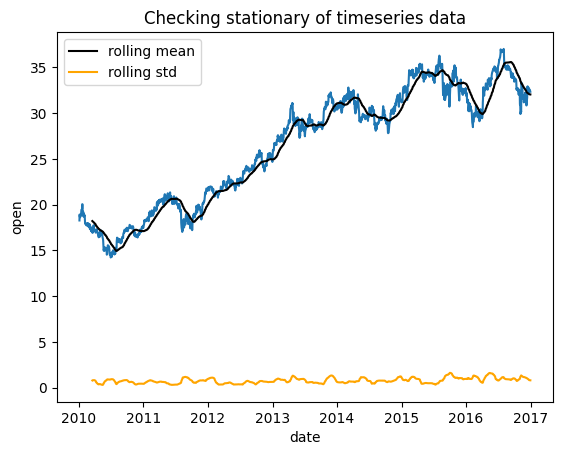

In [ ]:
sns.lineplot(x=pfizer.index,y=pfizer["open"])
sns.lineplot(x=pfizer.index,y=pfizer["open"].rolling(52).mean(),  color='black', label='rolling mean')
sns.lineplot(x=pfizer.index,y=pfizer["open"].rolling(52).std(),  color='orange', label='rolling std')
plt.title("Checking stationary of timeseries data")
